<a href="https://colab.research.google.com/github/gveloso7/Exercicios-DSA/blob/main/Projeto3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import sqlite3 as sqlite3
import matplotlib.pyplot as mtb
import datetime as dt
import seaborn as sns

1- Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [2]:
df = pd.read_csv('dataset.csv')

df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [11]:
#Filtrar o df somente com as informações de categoria

infocateg = df[df['Categoria']== 'Office Supplies']

#Agrupar por cidade e calcular o total de valor_venda

total = infocateg.groupby('Cidade')['Valor_Venda'].sum()

#Listar a cidade com maior valor de venda

cidade = total.idxmax()
print('\n A cidade com maior valor de vendas para Office Supplies é: ', cidade)



 A cidade com maior valor de vendas para Office Supplies é:  New York City


2.Qual o total de vendas por data do pedido?

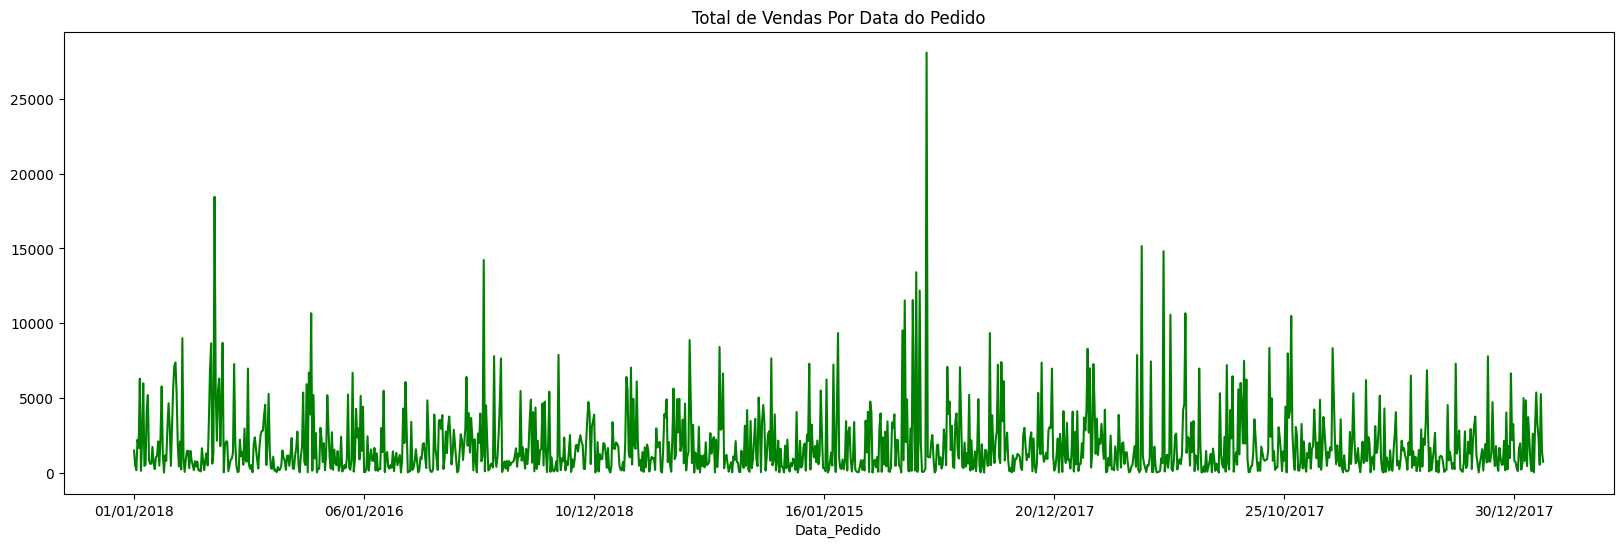

In [9]:
#Agrupando os valores de venda por data
vendaspordata = df.groupby('Data_Pedido')['Valor_Venda'].sum()

#criando o gráfico de barras
mtb.figure(figsize = (20, 6))
vendaspordata.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
mtb.title('Total de Vendas Por Data do Pedido')
mtb.show()

3. Qual o total de vendas por estado?

In [3]:
vendasporestado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

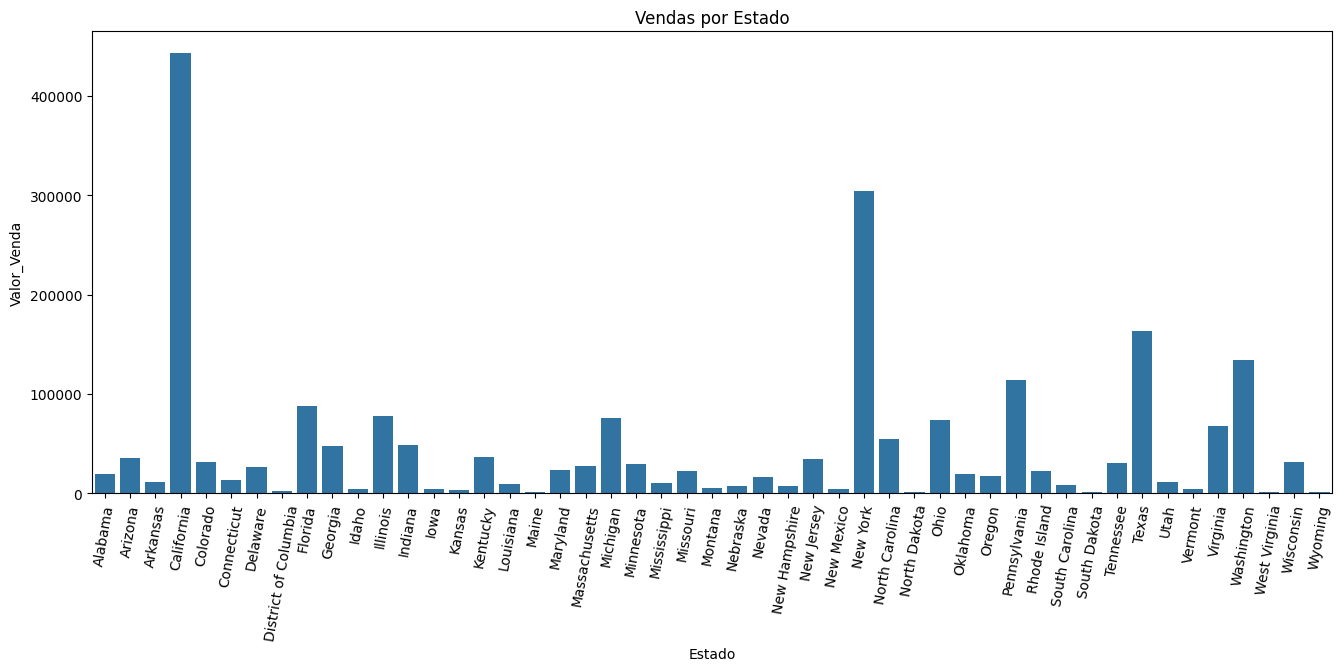

In [7]:
mtb.figure(figsize = (16, 6))
sns.barplot(data = vendasporestado,
  y = 'Valor_Venda',
  x = 'Estado').set(title = 'Vendas por Estado')
mtb.xticks(rotation = 80)
mtb.show()

4. Quais são as 10 cidades com maior valor de venda?

In [13]:
maiorvenda = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)
print(maiorvenda.head(10))

            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


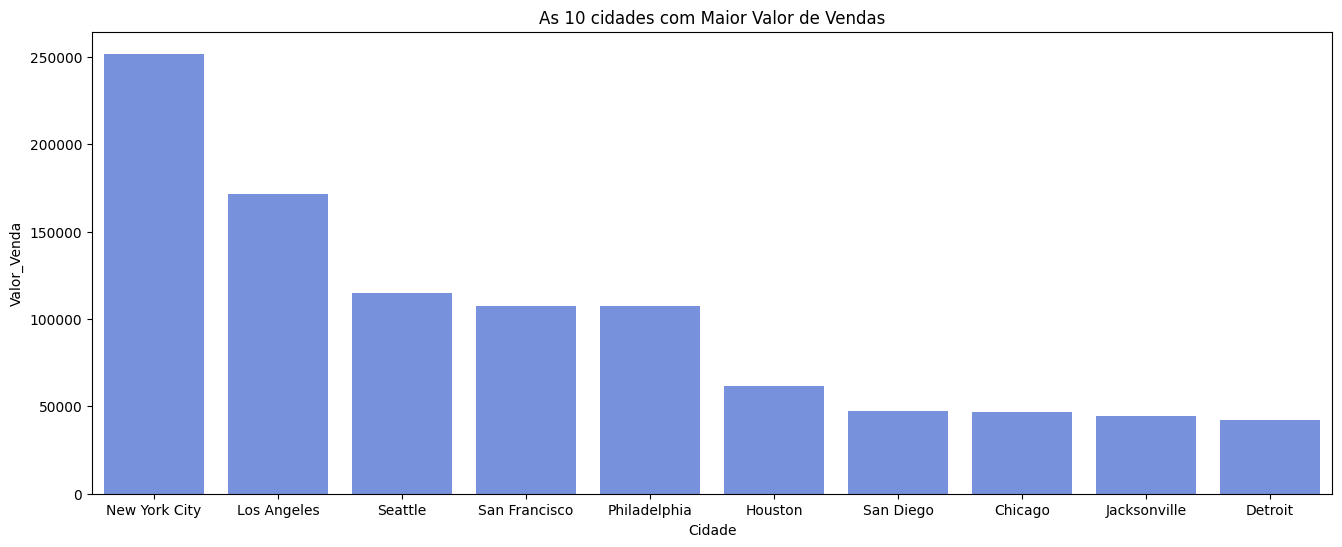

In [14]:
#Plot
mtb.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = maiorvenda, y = 'Valor_Venda', x = 'Cidade').set(title = 'As 10 cidades com Maior Valor de Vendas')
mtb.show()

5. Qual segmento teve o maior valor de vendas?

In [21]:
msegmento = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
print(msegmento)

      Segmento   Valor_Venda
0     Consumer  1.133834e+06
1    Corporate  6.792322e+05
2  Home Office  4.224914e+05


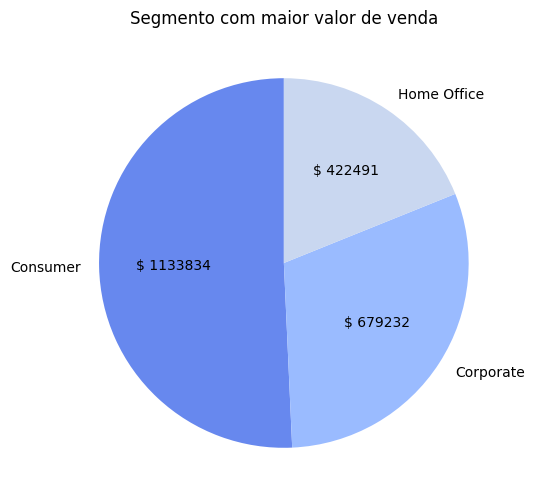

In [24]:
#Converter os dados em valor absoluto
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct * total/100.0))
    return '$ {v:d}'.format(v = val)
  return my_format

#plot
mtb.figure(figsize = (16, 6))

#grafico de pizza
mtb.pie(msegmento['Valor_Venda'],labels = msegmento['Segmento'], autopct = autopct_format(msegmento['Valor_Venda']), startangle = 90)
mtb.title('Segmento com maior valor de venda')
mtb.show()


6. Qual o total de vendas por segmento e por ano?

In [30]:
#Converter a coluna de data para obter o formato de ano
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

#Extrair o ano e criar uma nova variável

df['Ano'] = df['Data_Pedido'].dt.year

#Total de vendas por segmento e por ano

totalvendas = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum()
print(totalvendas)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


7. Se o Valor_Venda > 1000, recebe 15% de desconto. Se o Valor_Venda < 1000, recebe 10% de desconto

Quantas vendas receberiam 15% de desconto ?


In [34]:
#Criar nova coluna Desconto
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

#Tota por cada valor da variável
df['Desconto'].value_counts()



,count
Desconto,
0.10,9243
0.15,457
